# Malaria Predictions
___

ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches.**


### Visualizing the Data


-------
Let's take a closer look at the data.

In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

In [2]:
os.getcwd()

'/home/varun/notebooks/TensorFlow/Varun/05_Convolutional_Neural_Networks'

In [3]:
my_data_dir = '/home/varun/notebooks/TensorFlow/Varun/DATA/cell_images'

In [4]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir)

['train', 'test']

In [5]:
train_path = my_data_dir + '/train/'
test_path = my_data_dir + '/test/'

#### Train Path

In [6]:
train_path

'/home/varun/notebooks/TensorFlow/Varun/DATA/cell_images/train/'

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

#### Test Path

In [9]:
test_path

'/home/varun/notebooks/TensorFlow/Varun/DATA/cell_images/test/'

In [10]:
os.listdir(test_path)

['parasitized', 'uninfected']

#### parasitized cell

In [11]:
os.listdir(train_path + '/parasitized')[0]

'C39P4thinF_original_IMG_20150622_105554_cell_13.png'

In [13]:
para_cell = train_path + '/parasitized' + '/C39P4thinF_original_IMG_20150622_105554_cell_13.png'

In [15]:
para_img = imread(para_cell)

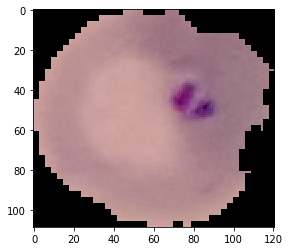

In [18]:
plt.imshow(para_img)

In [19]:
para_img.shape

(109, 121, 3)

#### uninfected cell

In [20]:
uninfected_cell_path = train_path + '/uninfected/' + os.listdir(train_path + '/uninfected')[0]

In [21]:
uninfected_cell = imread(uninfected_cell_path)

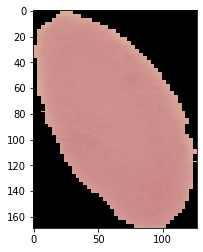

In [22]:
plt.imshow(uninfected_cell)

In [23]:
uninfected_cell.shape

(169, 127, 3)

**Let's check how many images there are.**

In [25]:
# parasitized cells
len(os.listdir(train_path + '/parasitized'))

12480

In [27]:
# uninfected cells
len(os.listdir(train_path + '/uninfected'))

12480

**Let's find out the average dimensions of these images.**

In [28]:
para_img.shape

(109, 121, 3)

In [29]:
uninfected_cell.shape

(169, 127, 3)

#### To get the dimensions of all `uninfected` images of test dataset

In [31]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + '/uninfected'):
    img = imread(test_path + '/uninfected/' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

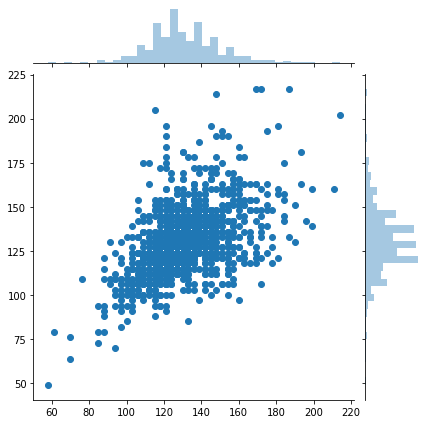

In [32]:
sns.jointplot(dim1, dim2)

#### Getting mean value of dimension-1

In [33]:
np.mean(dim1)

130.92538461538462

#### Getting mean value of dimension-2

In [34]:
np.mean(dim2)

130.75

In [36]:
image_shape = (130, 130, 3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
# help(ImageDataGenerator)

In [46]:
image_gen = ImageDataGenerator(rotation_range=20,       # rotate the image 20 degrees
                               width_shift_range=0.10,  # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255,           # Rescale the image by normalzing it.
                               shear_range=0.1,         # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1,          # Zoom in by 10% max
                               horizontal_flip=True,    # Allo horizontal flipping
                               fill_mode='nearest'      # Fill in missing pixels with the nearest filled value
                              )

#### Orignnal parasitized image

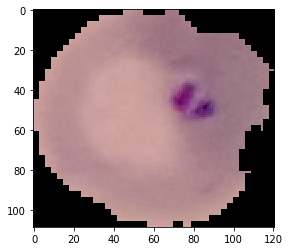

In [47]:
plt.imshow(para_img)

#### Modified parasitized image

##### Random-1

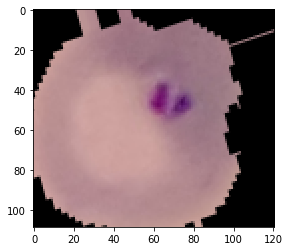

In [48]:
plt.imshow(image_gen.random_transform(para_img))

##### Random-2

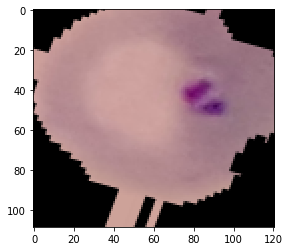

In [50]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [51]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [52]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Creating the Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [57]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation(activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation(activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

### Early Stopping

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Training the Model

In [62]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

#### Feeding images in batches

In [63]:
batch_size = 16

In [64]:
image_shape

(130, 130, 3)

In [65]:
image_shape[:2]

(130, 130)

In [66]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary'
                                               )

Found 24958 images belonging to 2 classes.


In [67]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False
                                              )

Found 2600 images belonging to 2 classes.


In [69]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [70]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [71]:
results = model.fit_generator(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop]
                             )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 185s 118ms/step - loss: 0.6799 - accuracy: 0.5618 - val_loss: 0.6921 - val_accuracy: 0.5177
Epoch 2/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.3578 - accuracy: 0.8546 - val_loss: 0.1939 - val_accuracy: 0.9323
Epoch 3/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.1899 - accuracy: 0.9382 - val_loss: 0.1827 - val_accuracy: 0.9404
Epoch 4/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.1743 - accuracy: 0.9441 - val_loss: 0.1764 - val_accuracy: 0.9442
Epoch 5/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.1682 - accuracy: 0.9457 - val_loss: 0.1664 - val_accuracy: 0.9419
Epoch 6/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.1629 - 

### Saving the Model

In [72]:
model.save('malaria_detector.h5')

## Evaluating the Model

In [73]:
losses = pd.DataFrame(model.history.history)

In [75]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.679860,0.561784,0.692143,0.517692
1,0.357802,0.854636,0.193880,0.932308
2,0.189938,0.938176,0.182689,0.940385
3,0.174358,0.944146,0.176406,0.944231
4,0.168187,0.945669,0.166388,0.941923
5,0.162864,0.947111,0.156323,0.948846
6,0.158552,0.949034,0.169494,0.943462
7,0.157820,0.948393,0.150544,0.949615
8,0.149532,0.951078,0.169127,0.945000
9,0.150703,0.951198,0.150629,0.946154


#### `loss` vs `val_loss`

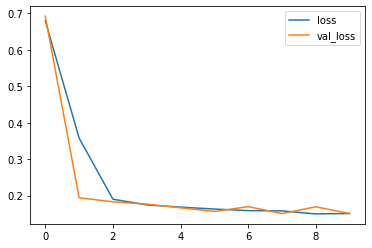

In [76]:
losses[['loss', 'val_loss']].plot()

#### `accuracy` vs `val_accuracy`

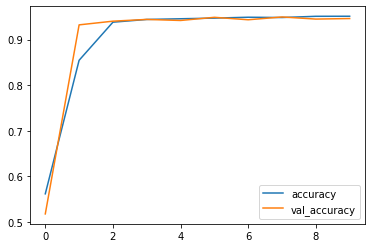

In [77]:
losses[['accuracy', 'val_accuracy']].plot()

### Ignore Warnings

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
print(model.metrics_names)
print(model.evaluate_generator(test_image_gen))

['loss', 'accuracy']
  ...
    to  
  ['...']
[0.15274461250369398, 0.9473077]


In [81]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [82]:
pred_probabilities

array([[4.0229480e-03],
       [4.8808246e-03],
       [9.2969491e-04],
       ...,
       [9.5011520e-01],
       [9.6386170e-01],
       [7.4486363e-01]], dtype=float32)

In [83]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

#### Predictions

In [84]:
predictions = pred_probabilities > 0.5

In [85]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

### Classification Report

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



### Confusion Matrix

In [88]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1227   73]
 [  58 1242]]


### Confusion Matrix as HeatMap

In [89]:
import seaborn as sns

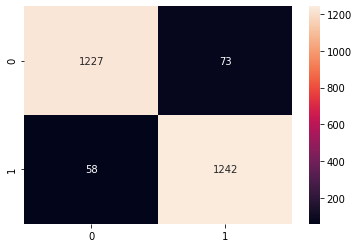

In [91]:
sns.heatmap(confusion_matrix(test_image_gen.classes, predictions), annot=True, fmt='.4g')

## Predicting on an Image

In [136]:
from tensorflow.keras.preprocessing import image

In [173]:
os.listdir(test_path + '/parasitized')[0]

'C134P95ThinF_IMG_20151005_122449_cell_133.png'

In [176]:
test_path + '/parasitized/' + os.listdir(test_path + 'parasitized')[0]

'/home/varun/notebooks/TensorFlow/Varun/DATA/cell_images/test//parasitized/C134P95ThinF_IMG_20151005_122449_cell_133.png'

In [179]:
my_image = image.load_img((test_path + '/parasitized/' + os.listdir(test_path + 'parasitized')[0]), target_size=image_shape)

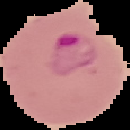

In [180]:
my_image

In [181]:
type(my_image)

PIL.Image.Image

In [182]:
my_image = image.img_to_array(my_image)

In [183]:
type(my_image)

numpy.ndarray

In [184]:
my_image.shape

(130, 130, 3)

In [185]:
my_image = np.expand_dims(my_image, axis=0)

In [186]:
my_image.shape

(1, 130, 130, 3)

#### Predict

In [187]:
model.predict(my_image)

array([[0.]], dtype=float32)

#### Actual Label

In [188]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

___

## Thank You!